# Future and Present Value

## Time Value of Money

"The money today worths more than money tomorrow".

The future money worth less because inflation will push prices down.

We can determine Future Value (FV) by two ways:
- Discrete model
- Continuous model

In [1]:
from math import exp


In [18]:
## Present and Future Value (Discrete Functions)
def futureDV(money, interestRate, time):
    '''Returns future discrete value'''
    return money*(1 + interestRate)**time

def presentDV(money, interestRate, time):
    '''Returns present discrete value'''
    return money*(1 + interestRate)**-time

## Present and Future Value (Continuous Functions based on differential equations)
def futureCV(money, interestRate, time):
    '''Returns future continuous value'''
    return money*exp(interestRate * time)

def presentCV(money, interestRate, time):
    '''Returns future continuous value'''
    return money*exp(-interestRate * time)

In [19]:
dol = 100
iRate = 0.05
n = 5
print(f"FV Discrete {futureDV(dol, iRate, n)}")
print(f"PV Discrete {presentDV(dol, iRate, n)}")
print(f"FV Continuous {futureCV(dol, iRate, n)}")
print(f"PV Continuous {presentCV(dol, iRate, n)}")


FV Discrete 127.62815625000003
PV Discrete 78.35261664684589
FV Continuous 128.40254166877415
PV Continuous 77.8800783071405


## Volatility

It is a statiscal **measure of dispersion** of returns based on **standard deviation**. Higher volatility means high risk.

We can use **Capital Asset Pricing Model (CAPM)** with a Beta value to approximate volatility.

## Future Contracts

Made in an attempt by producers and suppliers of assets with higher volatility (commodities, currency, etc) to **avoid market volatillity**.

They negotiate the price of a given asset in the future.

### Commodities

Commodities prices tipically **rise when inflation** is accelerating.
- Usually offers protections against inflation effects.

If we can't invest directly in a commodity, we can invest in a company that relies on the given commodity **(Pairs Trading Strategy)**.
- Gold and gold mines stocks.
    - It may be affected company performance, but usually there is a **positive correlation**.

### Currencies and the FOREX

**Exchange rate** is the rate at wich one national currency will be exchanged for another.
- This tell how much a given currency is worth in another currency.
- Governments and central banks can influence currency and exchanges rates.

**Forex** is the market for trading international currencies.

Factors Affecting Exchange Rates:
- **Interest rates**: can be manipulated by governments or central bank
    - Investors will lend money to banks of the given country for higher returns.
    
- **Money supply**: created by central bannk by printing too much currency 
    - May trigger **inflation**.
    - Investor will leave the currency that can push the value of a currency down
- **Financial Stability**: financial stability and economic growth have a huge impact of the exchange rate
    - Stability can be in political or financial sense
    
#### Arbitrage on the FOREX

We can construct a directed graph G(V, E) of the exchange rate table with V currencies.

- V nodes are currencies;
- E edges are relative values.

We take natural logarithm of the edges and multiply edges by -1.
- End up with a negative edge weighted G'(V, E) graph where **negative cycles are arbitrage opportunities**.

Besides that, we can use Bellman-Ford Shortest Path algorithm to find negatives cycles in O(V * E) running time.

It is only possible with high frequency trading.


## Bonds

It is a **debt investment**, which an investor loans money to an entity (company or government).

Bonds have some characteristics:
- Have a defined period of time;
- Interest rate can be variable or fixed.

They are considered as **fixed-income securities**

So when a company wants to raise money to projects they may issue bonds directly to investors instead get a loan from bank.

Usually, interest rates from bonds are **higher than loan to bank**.

### Type of Bonds

#### Zero-Coupon Bonds

This is the principal amount (a.k.a Face Value, Nominal Value or Par Value).

The principal amount is paid to the investor after a specified period of time.
- When dealing with zero-coupon bonds, no other cash payment is made.

Second parameters is **premium** or interest rate of the bond, it is what entity is willing to pay to investor.

Lastly, bonds have a **maturity date**, which is the agreement that defines the end of period.

Present Value is given by:

$$
PV = \frac{x}{(1 + r)^n}
$$


#### Coupon Bonds

Coupon bonds have principal amount too.

However, coupon bonds have **coupon rate**, it is a nominal percentage of the principal.
- The rate is paid annually
- Each coupon is redeembale per period for that percentage

To evaluate a coupon bonds, we need to calculate the present value for each coupon payment and then sum with present value of the principal, basically:

$$
\sum_{i = 1}^{n} \! \frac{c}{(1 + r)^i} + \frac{x}{(1 + r)^n}
$$

Another way to calculate is:

$$
\frac{c}{r}\; [1 - \frac{1}{(1 + r)^n}] + \frac{x}{(1 + r)^n}
$$

### Yield To Maturity (YTM)

#### Yield

It is a figure that show the return you get on a bond.

Calculable with a simple formula:

$$
\frac{annual\; coupon\; amount}{bond\; price}
$$

It is define how much money your investment is generating.

**Yield to Maturity** of a bond is the internal rate of return (overall interest rate) earned by an investor who buys bond at **t** (today) at **V** market price.

- We assume that the bond is held until T maturity
- All C<sub>i</sub> coupon and P principal payment are made on schedule

To calculate YTM, we have to solve this equation:

$$
V \; = \; \sum_{i = 1}^{n} c_i e^{-y(t_t - t)} + Pe^{-y(T-t)}
$$

Basically, we discount everything back to the **t** present gives the current **V** price.

### Bonds Prices and Market Interested Rates

Bonds and market interest rate **are negatively correlated**:
- When the cost of borrowing money rises, bonds price usually fall

Market interest rate is given (usually)  by monetary policy.
- If the market interest is high enough than it is better to **lend money to the bank** rather than buying bonds

### Macaulay Duration

**Macaulay Duration** is a measure of how long it takes for the price of a bond to be repaid by the cash flows.
- It is the time an investor would take to get back all his invested money in the bond by periodic interest as well as principal repayments
- For zero-coupon bonds, Macaulay duration is the same as **T** time to maturity

Bonds with longer **T** maturity are more sensitive to changes in market interest rate than bonds with short durations.

Therefore, Macaulay Duration defines **how sensitive the bond price is to the little change in the market interest rate**.
- Investor prefer bonds with longer maturity if they expect that interest rates will fall (and go down);
- Investor prefer bonds  with short maturity when interest rates are eithehr likely to go up or stay stable.

### Risk with Bonds

There are some risk associated to bonds:
- **Interest-Rate Risk**
    - Bond prices moves in opposite direction to changes in interest rate
- **Default Risk**
    - The risk that bond issuer may be unable to make principal and coupon payments on time
- **Inflation Risk**
    - Caused by variations in the value of cash flows dute to inflation as measured in terms of purchasing power

# Bonds Implementation with Python

In [3]:
from math import exp
class ZeroCouponBond:
    def __init__(self, principal, maturity, iRate):
        self.principal = principal
        self.maturity = maturity
        self.iRate = iRate/100
        
    def PV(self, x, n):
        return x / (1 + self.iRate)**n
    
    def Price(self):
        return self.PV(self.principal, self.maturity)
        
    def cPV(self, x, n):
        return x*exp(-self.iRate * n)
    
    def cPrice(self):
        return self.cPV(self.principal, self.maturity)
    
class CouponBond:
    def __init__(self, principal, rate, maturity, iRate):
        self.principal = principal
        self.rate = rate/100
        self.maturity = maturity
        self.iRate = iRate/100
        
    def PV(self, x, n):
        return x / (1 + self.iRate) ** n
    
    def Price(self):
        # ? Discount amount
        price = 0
        for t in range(1, self.maturity + 1):
            price = price + self.PV(self.principal * self.rate, t) 
        
        # ? Principal amount
        price  = price + self.PV(self.principal, self.maturity)
        
        return price

    def cPV(self, x, n):
        return x*exp(-self.iRate * n)
    
    def cPrice(self):
        price = 0
        for time in range(1, self.maturity + 1):
            price = price + self.cPV(self.principal * self.rate, time)
        
        price = price + self.cPV(self.principal, self.maturity)
        
        return price
        

In [4]:
# ! Discrete way
bond = ZeroCouponBond(1000, 2, 4)
print(f"Price of zero-coupon bond in dollars : {round(bond.Price(), 2)}")

bond = CouponBond(1000, 10, 3, 4)
print(f"Price of coupon bond in dollars : {round(bond.Price(), 2)}")

Price of zero-coupon bond in dollars : 924.56
Price of coupon bond in dollars : 1166.51


In [5]:
# ! Continuous way
bond = ZeroCouponBond(1000, 2, 4)
print(f"Price of zero-coupon bond in dollars : {round(bond.cPrice(), 2)}")

bond = CouponBond(1000, 10, 3, 4)
print(f"Price of coupon bond in dollars : {round(bond.cPrice(), 2)}")


Price of zero-coupon bond in dollars : 923.12
Price of coupon bond in dollars : 1164.0


## Statistics

### Expected Value 

The mean or expected value E(x) of an x random variable is the mean average value in the population.

Expected value is defined by:

$$
E(x) = \sum_{i} x_i p_i = \mu
$$

### Variance

The variance of an x random variable is the expected value of the squared deviations of variables from the mean, given by:

$$
\sigma^2 = E[(x - \mu)^2]
$$

### Standard Deviation

Defined as a square root of standard deviation:

$$
\sigma = \sqrt{\sigma^2}
$$

### Covariance

The covariance of an x and y is measure of the joint variability of two random variables, given by:

$$
Cov(x, y) = E[(x - \mu_x)(y - \mu_y)]
$$

It is a dimensional measure, but isn't normalized, making comparison between datasets with large spreads differences hard.

The covariance defines how tow variables move together.

### Correlation

Correlation value is always in range [-1, 1].

It is dimensionless measures because is covariance normalized by standard deviation:

$$
\delta(x,y) = \frac{Cov(x, y)}{\sigma_x \sigma_y}
$$

If correlation:
- **> 0**, a positive linear relationship;
- **= 0**, no relationship between variables;
- **< 0**, a negative linear relationship;


# Modern Portfolio Theory (a.k.a Markovitz Model)

It is a **portfolio optimization** model.
- Assists in the selection of the most efficient portfolio by considering variousu possible portfolios of given securities based on expected retuurn (mean) and risk (variance)

The main idea is combine multiple assets in order to reduce risk as much as possible.
- This concept is correlationed with **diverzification**

## Assumptions of Markovitz-Model

- Returns are normally distributed, so expected value is return and standard deviation is volatility
- Investor are risk-averse, that means that if investor wants more return, they need to take more risk
- Investor are not allowed to take short positions
- The stock will have the same performance in future based on his historical data
- It is about diverzification, so that means that we want to reduce risk as much as possible

The **efficient portfolio** is the portfolio that has the hightest reward foi a given level of risk or the lowest risk for a given return.

## Variables

- w<sub>i</sub>: Weight for i asset or stock;
- r<sub>i</sub>: return (historical data) for i-th asset or stock;
- u<sub>i</sub>: expected return (mean of returns)

To calculate u:
$$
E(x) = \sum_{i}x_i p_i
$$

To calculate returns, we use:
$$
r = \frac{S(t+1)-S(t)}{S(t)}
$$
Usually logarithm of return is used because mathematical convenience
$$
r = ln\frac{S(t+1)}{S(t)}
$$

## Expected Return

The Markovitz model is:
$$
\mu_{portfolio} = E(\Sigma_i w_i r_i) = \Sigma_i w_i E(r_i) = \Sigma_i w_i \mu_i = w^T\mu
$$

## Risk of Portfolio

The risk can be measured by the volatility, which can be approximated by standard deviation or variace.

We can define covariance to understand how variables move together:

$$
\sigma_{ij} = E[(r_i - \mu_i)(r_j - \mu_j)]
$$

If covariance:
- < 0: Move inversely
- \> 0: Moves together

For portfolio, variance is:

$$
\sigma^2_{portfolio} = E[(r_i - \mu_i)^2] = \sum_i \sum_j w_i w_j \sigma_{ij} = w^T\Sigma w
$$

## Sharpe Ratio

It is a **risk and return measure**.

Sharpe ratio describes how much excess return you are receiving for extra volatility that you are holding in a risky asset.

The formula is:

$$
S(x) = \frac{r_x - R_f}{\sigma (x)}
$$

Where:
- r<sub>x</sub>: average rate of return of an investment x
- R<sub>f</sub>: rate of return of risk-free security

A sharpe-ratio S(x) > 1 is considered to be a good investment.

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [71]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

inicio = '2012-01-01'
fim = '2017-01-01'

# Numbers of a trading days in a year
NUM_TRADING_DAYS = 252
# Numbers of randoms different portfolios
NUM_PORTFOLIOS = 10000

def downloadData():
    '''Download market data with Yahoo Finance'''
    stockData = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stockData[stock] = ticker.history(start = inicio, end = fim)['Close']
        
    return pd.DataFrame(stockData)

def showData(data):
    '''Plots a graph'''
    data.plot(figsize = (15, 8))
    plt.show()
    
def calculateReturn(data):
    '''Calculate log return (Normalization)'''
    logReturn = np.log(data/data.shift(1))
    return logReturn[1:]

def showST(returns):
    '''Show statistics of annual metrics'''
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)
    
def showMV(returns):
    '''Show mean variance'''
    portfolioReturn = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    # np.dot() multiplies arrays
    portfolioVolatility = np.sqrt(np.dot(weight.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weight)))
    print(f"Expected portfolio mean return {portfolioReturn}")
    print(f"Expected portfolio volatility {portfolioVolatility}")

def generatePortfolio(returns):
    '''Generate multiples portfolios'''
    pfMeans = []
    pfRisk = []
    pfWeights = []
    
    for _ in range(NUM_PORTFOLIOS):
        weight = np.random.random(len(stocks))
        weight /= np.sum(weight)
        pfWeights.append(weight)
        pfMeans.append(np.sum(returns.mean() * weight) * NUM_TRADING_DAYS)
        pfRisk.append(np.sqrt(np.dot(weight.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weight))))
    
    return np.array(pfWeights), np.array(pfMeans), np.array(pfRisk)
    
def showPortfolios(returns, vols):
    plt.figure(figsize = (15, 8))
    plt.scatter(vols, returns, c = returns/vols, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    
def statistics(weights, returns):
    pfReturn = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    pfVol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
    return np.array([pfReturn, pfVol, pfReturn/pfVol])

# SciPy optimize can found the minimum of a given functions, in this case, we will find min volatility
# the maximum of a f(x) is the minimum of -f(x)
def minFunctionSharpe(weights, returns):
    '''Get the statistics of sharpe ratio'''
    return -statistics(weights, returns)[2]

def optimizePort(weights, returns):
    '''Look for the portfolio with max sharpe ratio'''
    # The sum of weights is 1
    constraints = {
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }
    bounds = [tuple((0, 1)) for _ in range(len(stocks))]
    return optimization.minimize(fun = minFunctionSharpe, x0 = weights[0],
                          args = returns, method = 'SLSQP', bounds = bounds,
                         constraints = constraints)

def optimalPortfolio(optimum, returns):
    print(f"Optimal portfolio is {optimum['x'].round(3)}")
    print(f"Expected return, vol and Sharpe Ratio is {statistics(optimum['x'].round(3), returns)}")
    
def showOP(opt, rets, pfRets, pfVols):
    plt.figure(figsize = (15, 8))
    plt.scatter(pfVols, pfRets, c = pfRets/pfVols, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize = 20)
    plt.show()

In [3]:
def downloadData():
    '''Download market data with Yahoo Finance'''
    stockData = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stockData[stock] = ticker.history(start = inicio, end = fim)['Close']
        
    return pd.DataFrame(stockData)

In [2]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

inicio = '2012-01-01'
fim = '2017-01-01'



In [4]:
dados = downloadData()

In [105]:
portOtimos = Portfolios(dados)
#print(NUM_PORTFOLIOS)

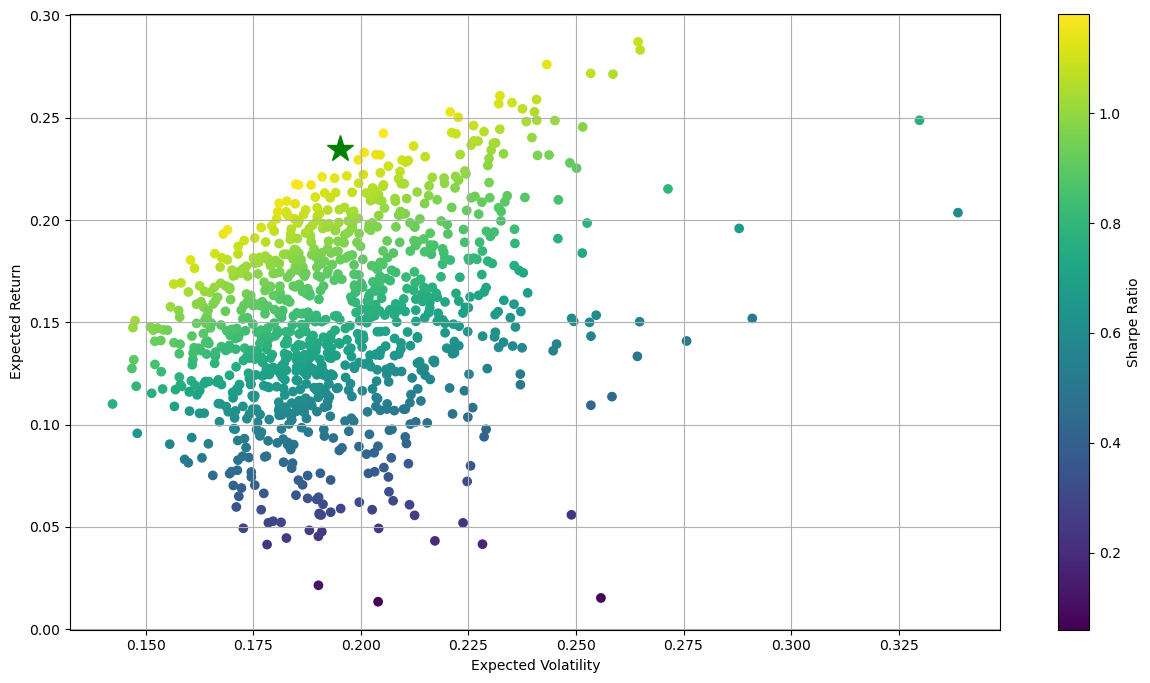

In [110]:
portOtimos.figuraOP()

In [112]:
portOtimos.optimalPortfolio()

Optimal portfolio for ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB'] is [0.139 0.    0.166 0.373 0.321 0.   ]
Expected return, vol and Sharpe Ratio is [0.23440554 0.19510547 1.20142986]


In [109]:
NUM_PORTFOLIOS = 10000
NUM_TRADING_DAYS = 252
# Código baseado em classe para implementação em projetos futuros
class Portfolios:
    def __init__(self, dados):
        self.dados = dados
        self.retornos = self.calculateReturn(self.dados)
        
        self.portfolios = {}
        
        self.portfolios['weights'], self.portfolios['means'],  self.portfolios['risks'] = self.generatePortfolios(self.retornos)
        
        self.otimo = self.optimizePort(self.portfolios['weights'], self.retornos)
        
        
    
    
    def calculateReturn(self, data):
        '''Calculate log return (Normalization)'''
        logReturn = np.log(data/data.shift(1))
        return logReturn[1:]
    
    def generatePortfolios(self, returns):
        '''Generate multiples portfolios'''
        pfMeans = []
        pfRisk = []
        pfWeights = []

        for _ in range(NUM_PORTFOLIOS):
            weight = np.random.random(len(stocks))
            weight /= np.sum(weight)
            pfWeights.append(weight)
            pfMeans.append(np.sum(returns.mean() * weight) * NUM_TRADING_DAYS)
            pfRisk.append(np.sqrt(np.dot(weight.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weight))))

        return np.array(pfWeights), np.array(pfMeans), np.array(pfRisk)
    
        
    def optimalPortfolio(self):
        optimum = self.otimo
        returns = self.retornos
        print(f"Optimal portfolio for {self.dados.columns.tolist()} is {optimum['x'].round(3)}")
        print(f"Expected return, vol and Sharpe Ratio is {self.statistics(optimum['x'].round(3), returns)}")
    
   
    def figuraData(self):
        '''Plots a graph'''
        data = self.dados
        data.plot(figsize = (15, 8))
        plt.show()
        
    def figuraPortfolio(self):
        returns = self.portfolios['means']
        vols = self.portfolios['risks']
        plt.figure(figsize = (15, 8))
        plt.scatter(vols, returns, c = returns/vols, marker = 'o')
        plt.grid(True)
        plt.xlabel('Expected Volatility')
        plt.ylabel('Expected Return')
        plt.colorbar(label = 'Sharpe Ratio')
    
    def figuraOP(self):
        opt = self.otimo
        rets = self.retornos
        pfRets = self.portfolios['means']
        pfVols = self.portfolios['risks']
        plt.figure(figsize = (15, 8))
        plt.scatter(pfVols, pfRets, c = pfRets/pfVols, marker = 'o')
        plt.grid(True)
        plt.xlabel('Expected Volatility')
        plt.ylabel('Expected Return')
        plt.colorbar(label = 'Sharpe Ratio')
        plt.plot(self.statistics(opt['x'], rets)[1], self.statistics(opt['x'], rets)[0], 'g*', markersize = 20)
        plt.show()
    
    def optimizePort(self, weights, returns):
        '''Look for the portfolio with max sharpe ratio'''
        # The sum of weights is 1
        constraints = {
            'type': 'eq',
            'fun': lambda x: np.sum(x) - 1
        }
        bounds = [tuple((0, 1)) for _ in range(len(stocks))]
        return optimization.minimize(fun = self.minFunctionSharpe, x0 = weights[0],
                              args = returns, method = 'SLSQP', bounds = bounds,
                             constraints = constraints)

    def statistics(self, weights, returns):
        pfReturn = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
        pfVol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
        return np.array([pfReturn, pfVol, pfReturn/pfVol])

    # SciPy optimize can found the minimum of a given functions, in this case, we will find min volatility
    # the maximum of a f(x) is the minimum of -f(x)
    def minFunctionSharpe(self, weights, returns):
        '''Get the statistics of sharpe ratio'''
        return -self.statistics(weights, returns)[2]    

In [42]:
#dados = downloadData()
#showData(dados)
retornos = calculateReturn(dados)
#showStatistics(retornos)
portfolios = {}
portfolios['weights'], portfolios['means'], portfolios['risks'] = generatePortfolio(retornos)

In [60]:
portfolios['weights']

array([[0.16331626, 0.02555109, 0.27470391, 0.10092838, 0.20466033,
        0.23084004],
       [0.09095742, 0.16146324, 0.26127451, 0.22104263, 0.17396587,
        0.09129632],
       [0.38535265, 0.13121173, 0.1514989 , 0.11803762, 0.10311767,
        0.11078142],
       ...,
       [0.1873303 , 0.03045823, 0.12071614, 0.13290808, 0.23861563,
        0.28997163],
       [0.24054466, 0.03874278, 0.01999159, 0.06847088, 0.31736655,
        0.31488353],
       [0.12784371, 0.07739553, 0.09004396, 0.26843426, 0.19690331,
        0.23937923]])

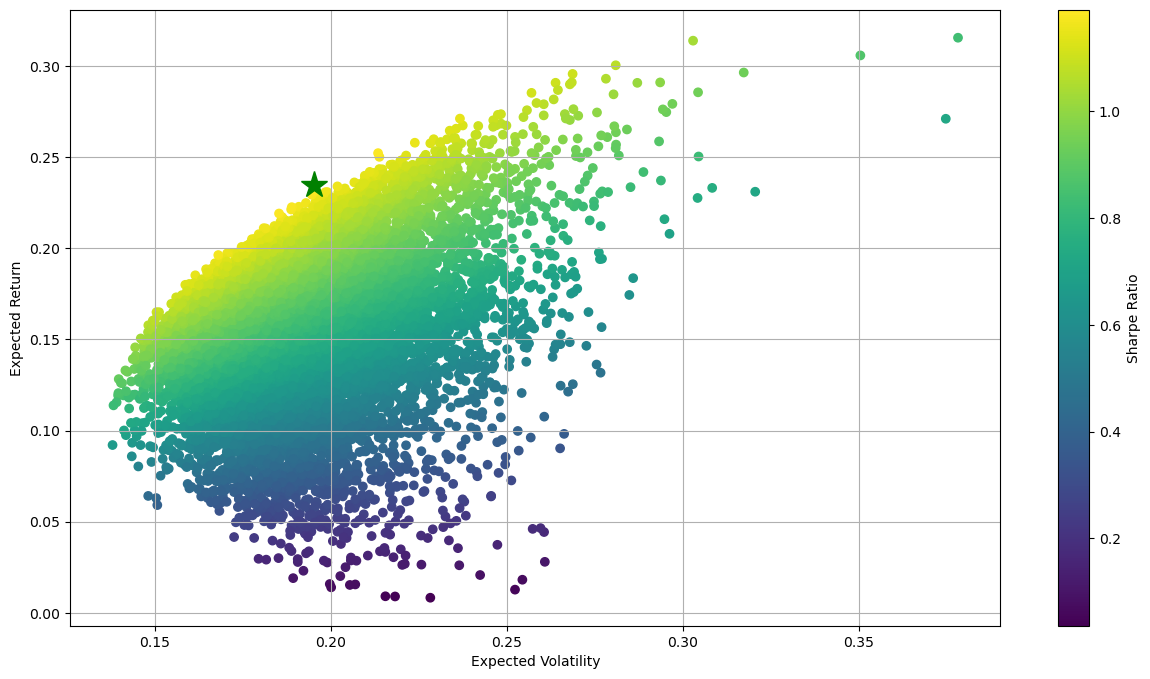

In [72]:
#showPortfolios(portfolios['means'], portfolios['risks'])
optimum = optimizePort(portfolios['weights'], retornos)
showOP(optimum, retornos, portfolios['means'], portfolios['risks'])


# CAPM - Capital Asset Pricing Model

## Risks in Finance

We should hold multiple stocks to reduce risk.

However, isn't possible to avoid all risk even with multiple stocks.

There are two types of risk:
- Unsystematic(Specific) Risk:
    - It is the risk of individual stocks, can be diverzified away
    - A component of stock return that is not correlated with market movement
    
- Systematic(Market) Risk
    - Can'''t be diverzified
    - It is the risk of change in interest rates, recessions or wars
    - CAPM model measures this risk with the Beta parameters
    
 
 
## The Model

CAPM was first formulated by William F. Sharpe (1960) and is a linear relationship between any stock expected return and the market premium.

It is given by:

$$
E[r_a] = r_f + \beta_a(E[r_m]-r_f)
$$

Where:

- E<sub>a</sub>: Expected return

- r<sub>f</sub>: Base return

- B<sub>a</sub>(E[r<sub>m</sub>]-r<sub>f</sub>): Market excess return or market premium, multiplied by a factor

In adition, we can calculate B parameter as:

$$
\beta_a = \frac{Cov(r_a, r_m)}{Var(r_m)}
$$

### Beta

The beta parameter define how risky the portfolio is relative to the market.
If B:
- B = 1: Stock is moving exactly as the market
- B > 1: Stock is more volatile than the market (more expected return)
- B < 1: Stock is less volatile than the market (less expected return)
